# <font color='red'> Spoken Digit Recognition</font>

## Importing Necessary Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import librosa
import os
import tensorflow as tf 
from tqdm import tqdm

## Downloading and Preprocessing the Data

###We shared recordings.zip, please unzip those. 

In [2]:
# Downloading recordings.zip data using gdown
!gdown --id 17YGQheavMbM6aeHYjUcGssXfb7eQHo1z

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=17YGQheavMbM6aeHYjUcGssXfb7eQHo1z
To: /content/recordings.zip
100% 9.28M/9.28M [00:00<00:00, 252MB/s]


In [3]:
# Extracting recordings.zip
! unzip recor*.zip

Archive:  recordings.zip
   creating: recordings/
  inflating: recordings/0_jackson_0.wav  
  inflating: recordings/0_jackson_1.wav  
  inflating: recordings/0_jackson_10.wav  
  inflating: recordings/0_jackson_11.wav  
  inflating: recordings/0_jackson_12.wav  
  inflating: recordings/0_jackson_13.wav  
  inflating: recordings/0_jackson_14.wav  
  inflating: recordings/0_jackson_15.wav  
  inflating: recordings/0_jackson_16.wav  
  inflating: recordings/0_jackson_17.wav  
  inflating: recordings/0_jackson_18.wav  
  inflating: recordings/0_jackson_19.wav  
  inflating: recordings/0_jackson_2.wav  
  inflating: recordings/0_jackson_20.wav  
  inflating: recordings/0_jackson_21.wav  
  inflating: recordings/0_jackson_22.wav  
  inflating: recordings/0_jackson_23.wav  
  inflating: recordings/0_jackson_24.wav  
  inflating: recordings/0_jackson_25.wav  
  inflating: recordings/0_jackson_26.wav  
  inflating: recordings/0_jackson_27.wav  
  inflating: recordings/0_jackson_28.wav  
  infla

###Separating labes from filenames

In [4]:
#read the all file names in the recordings folder given by us
#(if you get entire path, it is very useful in future)
#save those files names as list in "all_files"
path = '/content/recordings'
all_names = os.listdir('/content/recordings')
all_files = []
labels = []
for name in all_names:
    all_files.append(path+'/'+name)
    labels.append(int(name.split('_')[0]))

print(f"Sample file name: {all_files[0]}")
print(f"Sample label: {labels[0]}")


Sample file name: /content/recordings/4_nicolas_15.wav
Sample label: 4


Create a dataframe(name=df_audio) with two columns(path, label).   
You can get the label from the first letter of name.  
Eg: 0_jackson_0 --> 0  
0_jackson_43 --> 0

### Exploring the sound dataset

In [6]:
#It is a good programming practise to explore the dataset that you are dealing with. This dataset is unique in itself because it has sounds as input
#https://colab.research.google.com/github/Tyler-Hilbert/AudioProcessingInPythonWorkshop/blob/master/AudioProcessingInPython.ipynb
#visualize the data and write code to play 2-3 sound samples in the notebook for better understanding.
#please go through the following reference video https://www.youtube.com/watch?v=37zCgCdV468

In [6]:
# Get thinkdsp.py
if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py 

--2022-06-18 12:56:43--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py [following]
--2022-06-18 12:56:43--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48687 (48K) [text/plain]
Saving to: ‘thinkdsp.py’

thinkdsp.py         100%[===================>]  47.55K  --.-KB/s    in 0.01s   

2022-06-18 12:56:43 (4.61 MB/s) - ‘thinkdsp.py’ saved [48687/48687]



In [7]:
import thinkdsp
import matplotlib.pyplot as pyplot
import IPython
import tensorflow as tf

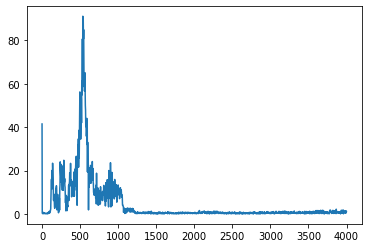

Writing sound.wav


In [8]:
# Exploring Sounds Dataset
wave = thinkdsp.read_wave(all_files[0])

# Plot spectrum of audio file
spectrum = wave.make_spectrum()
spectrum.plot()
pyplot.show()

# Play audio file
wave.play()
IPython.display.Audio('sound.wav')

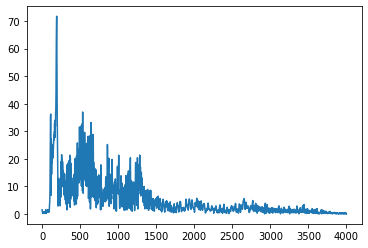

Writing sound.wav


In [9]:
# Exploring Sounds Dataset
wave = thinkdsp.read_wave(all_files[1])

# Plot spectrum of audio file
spectrum = wave.make_spectrum()
spectrum.plot()
pyplot.show()

# Play audio file
wave.play()
IPython.display.Audio('sound.wav')

### Creating dataframe

In [10]:
#Create a dataframe(name=df_audio) with two columns(path, label).   
#You can get the label from the first letter of name.  
#Eg: 0_jackson_0 --> 0  
#0_jackson_43 --> 0
df_audio = pd.DataFrame({"path": all_files, "label":labels})

In [11]:
#info
df_audio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    2000 non-null   object
 1   label   2000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [13]:
from sklearn.utils import shuffle
df_audio = shuffle(df_audio, random_state=33)#don't change the random state

<pre><font size=4>Train and Validation split</font></pre>

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
#split the data into train and validation and save in X_train, X_test, y_train, y_test
#use stratify sampling
#use random state of 45
#use test size of 30%
X = df_audio["path"]
y = df_audio["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45, stratify=y)
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1400,)
y_train shape: (1400,)
X_test shape: (600,)
y_test shape: (600,)


###Converting .wav files to raw data

<pre><font size=4>Preprocessing</font>

All files are in the "WAV" format. We will read those raw data files using the librosa</pre>

In [18]:
sample_rate = 22050
def load_wav(x, get_duration=True):
    '''This return the array values of audio with sampling rate of 22050 and Duration'''
    #loading the wav file with sampling rate of 22050
    samples, sample_rate = librosa.load(x, sr=22050)
    if get_duration:
        duration = librosa.get_duration(samples, sample_rate)
        return [samples, duration]
    else:
        return samples

In [19]:
#use load_wav function that was written above to get every wave. 
#save it in X_train_processed and X_test_processed
# X_train_processed/X_test_processed should be dataframes with two columns(raw_data, duration) with same index of X_train/y_train
X_train_indices = X_train.index
X_test_indices = X_test.index

In [20]:
train_processed_samples = []
train_processed_durations = []
for row in X_train:
    result = load_wav(row)
    train_processed_samples.append(result[0])
    train_processed_durations.append(result[1])

X_train_processed = pd.DataFrame({"raw_data":train_processed_samples, "duration":train_processed_durations})
X_train_processed.set_index(X_train_indices, inplace=True)
X_train_processed.head()

,raw_data,duration
349,"[9.440214e-05, 0.00016939559, 0.00022562861, 0...",0.279637
511,"[-0.007722259, -0.008989066, -0.008674506, -0....",0.303764
1920,"[0.005350651, 0.0040472667, 0.0012626472, -0.0...",0.506757
128,"[3.5192286e-05, -0.000110204404, -0.0002195765...",0.472018
373,"[-0.00054838305, -0.000720711, -0.00075189554,...",0.472381


In [21]:
test_processed_samples = []
test_processed_durations = []
for row in X_test:
    result = load_wav(row)
    test_processed_samples.append(result[0])
    test_processed_durations.append(result[1])

X_test_processed = pd.DataFrame({"raw_data":test_processed_samples, "duration":test_processed_durations})
X_test_processed.set_index(X_test_indices, inplace=True)
X_test_processed.head()

,raw_data,duration
1533,"[-0.01409185, -0.02051629, -0.020303873, -0.01...",0.493152
230,"[0.0009771939, 0.0005439483, -4.6289762e-05, -...",0.328027
1298,"[0.00039773763, 0.0003481351, 0.00015808274, 1...",0.255283
1826,"[-0.029154653, -0.028881263, -0.020297956, -0....",0.143628
1857,"[0.00014770971, 0.0002798872, 0.00036414983, 0...",0.356009


###Choosing max_length by analyzing audio durations

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdae6425e50>]],
      dtype=object)

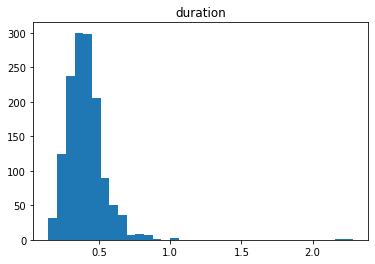

In [22]:
#plot the histogram of the duration for train
X_train_processed.hist(column="duration", grid=False, bins=35)

In [23]:
#print 0 to 100 percentile values with step size of 10 for train data duration. 
for p in range(0, 101, 10):
    ptile = np.percentile(X_train_processed["duration"], p)
    print(f"{p} th percentile is {ptile}.")

0 th percentile is 0.1435374149659864.
10 th percentile is 0.2607074829931973.
20 th percentile is 0.2993560090702948.
30 th percentile is 0.33127437641723356.
40 th percentile is 0.3569160997732426.
50 th percentile is 0.389750566893424.
60 th percentile is 0.4171156462585034.
70 th percentile is 0.4453469387755102.
80 th percentile is 0.48113378684807256.
90 th percentile is 0.5410657596371882.
100 th percentile is 2.282766439909297.


In [24]:
##print 90 to 100 percentile values with step size of 1. 
for p in range(90, 101):
    ptile = np.percentile(X_train_processed["duration"], p)
    print(f"{p} th percentile is {ptile}.")

90 th percentile is 0.5410657596371882.
91 th percentile is 0.5557034013605443.
92 th percentile is 0.5718839002267584.
93 th percentile is 0.5882585034013608.
94 th percentile is 0.6078993197278911.
95 th percentile is 0.622766439909297.
96 th percentile is 0.6420553287981859.
97 th percentile is 0.6635891156462584.
98 th percentile is 0.6906947845804988.
99 th percentile is 0.7963859410430838.
100 th percentile is 2.282766439909297.


<b>Based on our analysis 99 percentile values are less than 0.8sec so we will limit maximum length of X_train_processed and X_test_processed to 0.8 sec. It is similar to pad_sequence for a text dataset.</b>

<b>While loading the audio files, we are using sampling rate of 22050 so one sec will give array of length 22050. so, our maximum length is 0.8*22050 = 17640
</b>
<b>Pad with Zero if length of sequence is less than 17640 else Truncate the number. </b>

<b> Also create a masking vector for train and test. </b>

<b> masking vector value = 1 if it is real value, 0 if it is pad value. Masking vector data type must be bool.</b>


In [26]:
max_length  = 17640

###Padding and masking raw data

In [27]:
# Padding and masking train raw_data
X_train_pad_seq = []
X_train_mask = []
for array in X_train_processed['raw_data'].values:
    if len(array) >= max_length:
        X_train_pad_seq.append(array[0:max_length])
        X_train_mask.append(np.ones(max_length, dtype=bool))
    else:
        diff = max_length - len(array)
        pad = np.zeros(diff, dtype=int)
        m1 = np.ones(len(array), dtype=bool)
        m0 = np.zeros(diff, dtype=bool)
        mask = np.append(m1, m0)
        out = np.append(array, pad)
        X_train_pad_seq.append(out)
        X_train_mask.append(mask)

X_train_pad_seq = np.array(X_train_pad_seq).reshape(1400, -1)
X_train_mask = np.array(X_train_mask).reshape(1400, -1)

# Padding and masking test raw_data
X_test_pad_seq = []
X_test_mask = []
for array in X_test_processed['raw_data'].values:
    if len(array) >= max_length:
        X_test_pad_seq.append(array[0:max_length])
        X_test_mask.append(np.ones(max_length, dtype=bool))
    else:
        diff = max_length - len(array)
        pad = np.zeros(diff, dtype=int)
        m1 = np.ones(len(array), dtype=bool)
        m0 = np.zeros(diff, dtype=bool)
        mask = np.append(m1, m0)
        out = np.append(array, pad)
        X_test_pad_seq.append(out)
        X_test_mask.append(mask)

X_test_pad_seq = np.array(X_test_pad_seq).reshape(600, -1)
X_test_mask = np.array(X_test_mask).reshape(600, -1)

###Defining micro_f1 score callback and metric

In [29]:
#Defining micro_f1score metric
from sklearn.metrics import f1_score
def f1(x,y):
    sc = f1_score(x, y, average='micro')
    return sc

def micro_f1score(y_true, y_pred):
    #y_pred = int(tf.math.argmax(y_pred))
    scr = tf.py_function(f1, [y_true, y_pred], tf.double)
    return scr

##Defining, training and evaluating models 1 and 2

### Model 1: Giving Raw data directly. 


Now we have

Train data: X_train_pad_seq, X_train_mask and y_train  
Test data: X_test_pad_seq, X_test_mask and y_test   

We will create a LSTM model which takes this input. 

Task:

1. Create an LSTM network which takes "X_train_pad_seq" as input, "X_train_mask" as mask input. You can use any number of LSTM cells. Please read LSTM documentation(https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM) in tensorflow to know more about mask and also https://www.tensorflow.org/guide/keras/masking_and_padding 
2. Get the final output of the LSTM and give it to Dense layer of any size and then give it to Dense layer of size 10(because we have 10 outputs) and then compile with the sparse categorical cross entropy( because we are not converting it to one hot vectors). Also check the datatype of class labels(y_values) and make sure that you convert your class labels  to integer datatype before fitting in the model.
3. While defining your model make sure that you pass both the input layer and mask input layer as input to lstm layer as follows
<img src='https://i.imgur.com/FvcgvbY.jpg'>
4. Use tensorboard to plot the graphs of loss and metric(use custom micro F1 score as metric) and histograms of gradients. You can write your code for computing F1 score using this <a  href='https://i.imgur.com/8YULUcu.jpg'>link</a> 

5. make sure that it won't overfit. 
6. You are free to include any regularization


In [ ]:
# Importing Model Components
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.models import Model

In [ ]:
## as discussed above, please write the architecture of the model.
## you will have two input layers in your model (data input layer and mask input layer)
## make sure that you have defined the data type of masking layer as bool

In [ ]:
# Defining Model 1
input_layer = Input(shape=(17640, 1), dtype='float32', name='raw_input')
mask_input_layer = Input(shape=(17640,), dtype='bool', name='mask_input')
lstm_layer = LSTM(128, activation='tanh', name='lstm_layer')(input_layer, mask=mask_input_layer)
dense1 = Dense(64, activation='relu', name='first_dense')(lstm_layer)
output = Dense(10, activation='softmax', name='output_layer')(dense1)

model_1 = Model(inputs=(input_layer, mask_input_layer), outputs=output, name='model_1')

model_1.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 raw_input (InputLayer)         [(None, 17640, 1)]   0           []                               
                                                                                                  
 mask_input (InputLayer)        [(None, 17640)]      0           []                               
                                                                                                  
 lstm_layer (LSTM)              (None, 128)          66560       ['raw_input[0][0]',              
                                                                  'mask_input[0][0]']             
                                                                                                  
 first_dense (Dense)            (None, 64)           8256        ['lstm_layer[0][0]']       

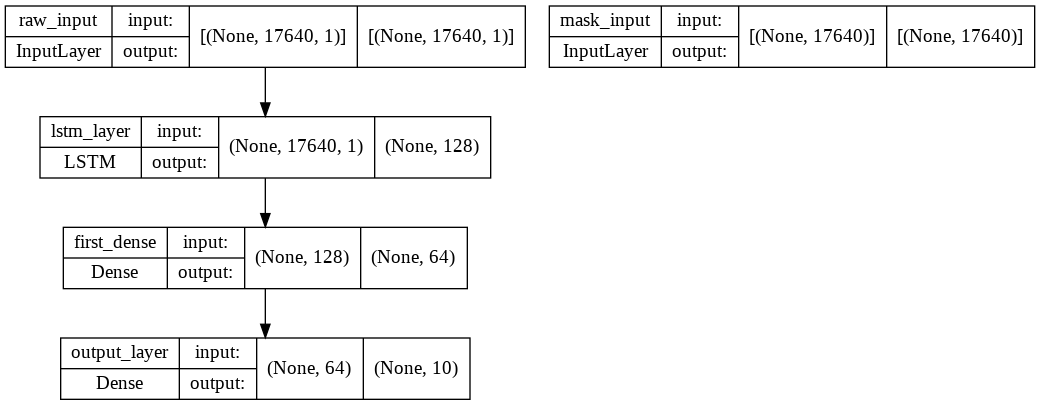

In [ ]:
# Plotting the Model
from tensorflow.keras.utils import plot_model
plot_model(model_1, show_shapes=True)

In [ ]:
#train your model
#model1.fit([X_train_pad_seq,X_train_mask],y_train_int,.........)

In [ ]:
# Importing Callbacks
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import TensorBoard
import os

In [ ]:
if 'Model_1' not in os.listdir():
    os.mkdir('Model_1')
    os.mkdir('Model_1/saved_models')
    os.mkdir('Model_1/tb_logs')

In [ ]:
# Defining micro_f1 score metric class
from sklearn.metrics import f1_score
import tensorflow as tf

class F1_Metric(tf.keras.callbacks.Callback):

    def __init__(self, validation_data):
        super().__init__()
        self.x_val = validation_data[0]
        self.y_val = validation_data[1]

    def on_train_begin(self, logs={}):
        logs = {'micro_f1_val':[]}

    def on_epoch_end(self, epoch, logs={}):

        val_pred = np.asarray(self.model.predict(self.x_val))
        val_label = np.argmax(val_pred, axis=1)
        val_target = self.y_val
        score = f1_score(val_label, val_target, average='micro')
        logs['micro_f1_val'] = score

In [ ]:
save_path = '/content/Model_1/saved_models/{epoch:02d}_{val_loss:.3f}.hdf5'
saver = ModelCheckpoint(filepath=save_path, monitor='val_loss', save_best_only=False)
logs_path = '/content/Model_1/tb_logs'
tb = TensorBoard(log_dir=logs_path)
stopper = EarlyStopping(patience=5)
f1 = F1_Metric(([X_test_pad_seq, X_test_mask], y_test))

In [ ]:
# Compiling Model_1
callbacks = [saver, tb, stopper, f1]

model_1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics = ['accuracy'])

In [ ]:
history_1 = model_1.fit([X_train_pad_seq, X_train_mask], y_train, batch_size=16,
                        epochs=25, validation_data=([X_test_pad_seq, X_test_mask], y_test),
                        callbacks=callbacks, verbose=1)

Epoch 1/25
88/88 [==============================] - 63s 673ms/step - loss: 2.3038 - accuracy: 0.0871 - val_loss: 2.3027 - val_accuracy: 0.0983 - micro_f1_val: 0.0983
Epoch 2/25
88/88 [==============================] - 57s 646ms/step - loss: 2.3037 - accuracy: 0.0843 - val_loss: 2.3026 - val_accuracy: 0.1000 - micro_f1_val: 0.1000
Epoch 3/25
88/88 [==============================] - 57s 647ms/step - loss: 2.3032 - accuracy: 0.0957 - val_loss: 2.3026 - val_accuracy: 0.1000 - micro_f1_val: 0.1000
Epoch 4/25
88/88 [==============================] - 57s 645ms/step - loss: 2.3030 - accuracy: 0.0964 - val_loss: 2.3026 - val_accuracy: 0.1000 - micro_f1_val: 0.1000
Epoch 5/25
88/88 [==============================] - 56s 643ms/step - loss: 2.3030 - accuracy: 0.0829 - val_loss: 2.3026 - val_accuracy: 0.1017 - micro_f1_val: 0.1017
Epoch 6/25
88/88 [==============================] - 56s 642ms/step - loss: 2.3028 - accuracy: 0.0964 - val_loss: 2.3025 - val_accuracy: 0.1017 - micro_f1_val: 0.1017
Epoc

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=/content/Model_1/tb_logs

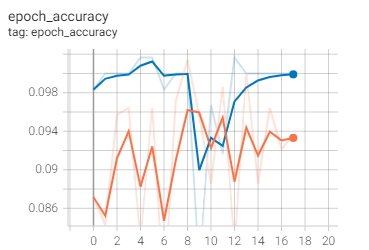

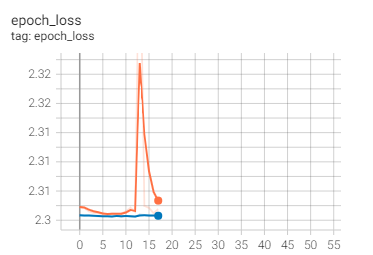

By analyzing above plots and training logs,  model state after 13th epoch is selected as best_model1.

In [ ]:
best_model1 = tf.keras.models.load_model('/content/Model_1/saved_models/13_2.302.hdf5')
m1_eval = best_model1.evaluate([X_test_pad_seq, X_test_mask], y_test)

19/19 [==============================] - 6s 231ms/step - loss: 2.3025 - accuracy: 0.1017


In [ ]:
m1_preds = best_model1.predict([X_test_pad_seq, X_test_mask])
m1_preds = np.argmax(m1_preds, axis=1)
m1_f1 = f1_score(y_test, m1_preds, average='micro')

In [ ]:
print("Best Model 1 Parameters: ")
print(f"Val_loss: {np.round(m1_eval[0],4)}")
print(f"Val_accuracy: {np.round(m1_eval[1],4)}")
print(f"Val_micro_f1: {np.round(m1_f1, 4)}")

Best Model 1 Parameters: 
Val_loss: 2.3025
Val_accuracy: 0.1017
Val_micro_f1: 0.1017


### Model 2: Converting into spectrogram and giving spectrogram data as input  

We can use librosa to convert raw data into spectrogram. A spectrogram shows the features in a two-dimensional representation with the
intensity of a frequency at a point in time i.e we are converting Time domain to frequency domain. you can read more about this in https://pnsn.org/spectrograms/what-is-a-spectrogram


In [30]:
def convert_to_spectrogram(raw_data):
    '''converting to spectrogram'''
    spectrum = librosa.feature.melspectrogram(y=raw_data, sr=sample_rate, n_mels=64)
    logmel_spectrum = librosa.power_to_db(S=spectrum, ref=np.max)
    return logmel_spectrum

In [31]:
##use convert_to_spectrogram and convert every raw sequence in X_train_pad_seq and X_test_pad-seq.
## save those all in the X_train_spectrogram and X_test_spectrogram ( These two arrays must be numpy arrays)

# Converting train raw data into spectrogram
X_train_spectrogram = np.asarray([convert_to_spectrogram(data) for data in X_train_pad_seq])
# Converting test raw data into spectrogram
X_test_spectrogram = np.asarray([convert_to_spectrogram(data) for data in X_test_pad_seq])

# Printing shapes
print(X_train_spectrogram.shape)
print(X_test_spectrogram.shape)

(1400, 64, 35)
(600, 64, 35)



Now we have

Train data: X_train_spectrogram and y_train  
Test data: X_test_spectrogram and y_test   

We will create a LSTM model which takes this input. 

Task:

1. Create an LSTM network which takes "X_train_spectrogram" as input and has to return output at every time step. 
2. Average the output of every time step and give this to the Dense layer of any size. 
(ex: Output from LSTM will be  (None, time_steps, features) average the output of every time step i.e, you should get (None,time_steps) 
and then pass to dense layer )
3. give the above output to Dense layer of size 10( output layer) and train the network with sparse categorical cross entropy.  
4. Use tensorboard to plot the graphs of loss and metric(use custom micro F1 score as metric) and histograms of gradients. You can write your code for computing F1 score using this <a  href='https://i.imgur.com/8YULUcu.jpg'>link</a> 
5. make sure that it won't overfit. 
6. You are free to include any regularization


In [ ]:
# write the architecture of the model
#print model.summary and make sure that it is following point 2 mentioned above

In [ ]:
#compile and fit your model.
#model2.fit([X_train_spectrogram],y_train_int,......)

In [33]:
from tensorflow.keras.layers import Input, LSTM, Dense, GlobalAveragePooling1D
from tensorflow.keras.models import Model
import tensorflow as tf

In [34]:
# Defining Model 2
input_layer = Input(shape=(64, 35), dtype='float32', name='spectro_input')
lstm_layer = LSTM(128, activation='tanh', return_sequences=True, name='lstm_layer')(input_layer)
pool_1d = GlobalAveragePooling1D(name='avg_pool', data_format='channels_first')(lstm_layer)
dense1 = Dense(64, activation='relu', name='first_dense')(pool_1d)
dense2 = Dense(32, activation='relu', name='second_dense')(dense1)
dense3 = Dense(16, activation='relu', name='third_dense')(dense2)
output = Dense(10, activation='softmax', name='output_layer')(dense3)

model_2 = Model(inputs=(input_layer), outputs=output, name='model_2')

model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 spectro_input (InputLayer)  [(None, 64, 35)]          0         
                                                                 
 lstm_layer (LSTM)           (None, 64, 128)           83968     
                                                                 
 avg_pool (GlobalAveragePool  (None, 64)               0         
 ing1D)                                                          
                                                                 
 first_dense (Dense)         (None, 64)                4160      
                                                                 
 second_dense (Dense)        (None, 32)                2080      
                                                                 
 third_dense (Dense)         (None, 16)                528       
                                                           

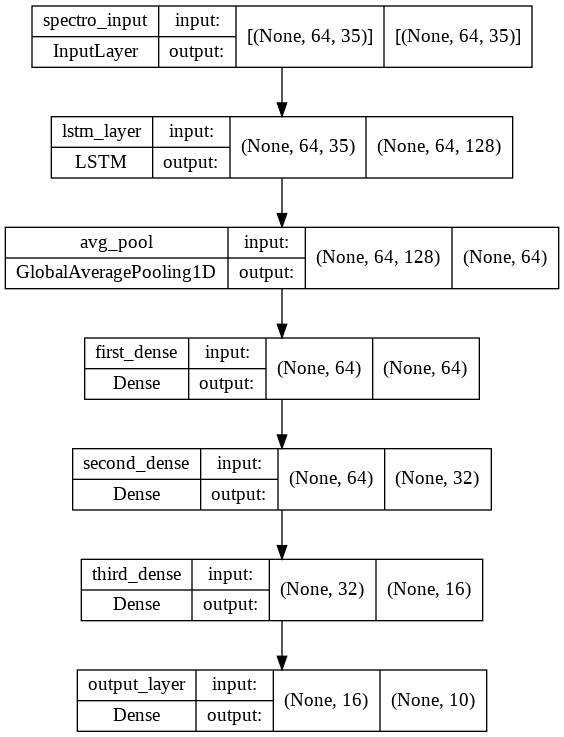

In [35]:
# Plotting model_2
from tensorflow.keras.utils import plot_model
plot_model(model_2, show_shapes=True)

In [36]:
# Defining micro_f1 score metric class
from sklearn.metrics import f1_score
import tensorflow as tf

class F1_Metric(tf.keras.callbacks.Callback):

    def __init__(self, validation_data):
        super().__init__()
        self.x_val = validation_data[0]
        self.y_val = validation_data[1]

    def on_train_begin(self, logs={}):
        logs = {'micro_f1_val':[]}

    def on_epoch_end(self, epoch, logs={}):

        val_pred = np.asarray(self.model.predict(self.x_val))
        val_label = np.argmax(val_pred, axis=1)
        val_target = self.y_val
        score = f1_score(val_label, val_target, average='micro')
        logs['micro_f1_val'] = score

In [37]:
# Importing Callbacks
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import TensorBoard
import os

In [38]:
if 'Model_2' not in os.listdir():
    os.mkdir('Model_2')
    os.mkdir('Model_2/saved_models')
    os.mkdir('Model_2/tb_logs')

In [39]:
save_path = '/content/Model_2/saved_models/epoch-{epoch:02d}_val_loss-{val_loss:.3f}.hdf5'
saver = ModelCheckpoint(filepath=save_path, monitor='val_loss', save_best_only=True)
logs_path = '/content/Model_2/tb_logs'
tb = TensorBoard(log_dir=logs_path)
stopper = EarlyStopping(monitor='val_loss', patience=5)

In [40]:
f1 = F1_Metric([X_test_spectrogram, y_test])
callbacks = [f1, saver, tb, stopper]

In [41]:
model_2.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=['accuracy'])

In [42]:
history_2 = model_2.fit(X_train_spectrogram, y_train, batch_size=128, epochs=100,
                        validation_data=(X_test_spectrogram, y_test),
                        callbacks=callbacks)

Epoch 1/100
11/11 [==============================] - 8s 114ms/step - loss: 2.2996 - accuracy: 0.1071 - val_loss: 2.2959 - val_accuracy: 0.1300 - micro_f1_val: 0.1300
Epoch 2/100
11/11 [==============================] - 0s 28ms/step - loss: 2.2909 - accuracy: 0.1507 - val_loss: 2.2864 - val_accuracy: 0.1417 - micro_f1_val: 0.1417
Epoch 3/100
11/11 [==============================] - 0s 27ms/step - loss: 2.2814 - accuracy: 0.1464 - val_loss: 2.2772 - val_accuracy: 0.1350 - micro_f1_val: 0.1350
Epoch 4/100
11/11 [==============================] - 0s 26ms/step - loss: 2.2660 - accuracy: 0.1571 - val_loss: 2.2578 - val_accuracy: 0.1583 - micro_f1_val: 0.1583
Epoch 5/100
11/11 [==============================] - 0s 26ms/step - loss: 2.2447 - accuracy: 0.1671 - val_loss: 2.2322 - val_accuracy: 0.1833 - micro_f1_val: 0.1833
Epoch 6/100
11/11 [==============================] - 0s 26ms/step - loss: 2.2114 - accuracy: 0.1871 - val_loss: 2.1979 - val_accuracy: 0.2100 - micro_f1_val: 0.2100
Epoch 7/1

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=/content/Model_2/tb_logs

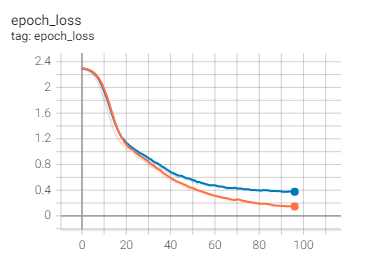

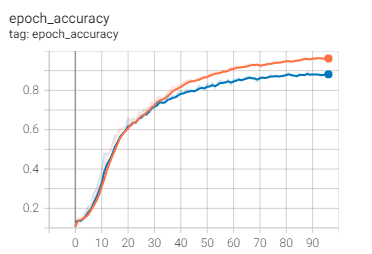

By analyzing above plots and training logs,  model state after 59th epoch is selected as best_model2.



In [46]:
best_model2 = tf.keras.models.load_model('/content/Model_2/saved_models/epoch-59_val_loss-0.463.hdf5')
m2_eval = best_model2.evaluate([X_test_spectrogram], y_test)

19/19 [==============================] - 0s 4ms/step - loss: 0.4626 - accuracy: 0.8533


In [47]:
m2_preds = best_model2.predict([X_test_spectrogram])
m2_preds = np.argmax(m2_preds, axis=1)
m2_f1 = f1_score(y_test, m2_preds, average='micro')

In [48]:
print("Best Model 2 Parameters: ")
print(f"Val_loss: {np.round(m2_eval[0],4)}")
print(f"Val_accuracy: {np.round(m2_eval[1],4)}")
print(f"Val_micro_f1: {np.round(m2_f1, 4)}")

Best Model 2 Parameters: 
Val_loss: 0.4626
Val_accuracy: 0.8533
Val_micro_f1: 0.8533


##Data Augmentation 

Till now we have done with 2000 samples only. It is very less data. We are giving the process of generating augmented data below.

There are two types of augmentation:
1. time stretching - Time stretching either increases or decreases the length of the file. For time stretching we move the file 30% faster or slower
2. pitch shifting - pitch shifting moves the frequencies higher or lower. For pitch shifting we shift up or down one half-step.


In [30]:
## generating augmented data. 
def generate_augmented_data(file_path):
    augmented_data = []
    samples = load_wav(file_path,get_duration=False)
    for time_value in [0.7, 1, 1.3]:
        for pitch_value in [-1, 0, 1]:
            time_stretch_data = librosa.effects.time_stretch(samples, rate=time_value)
            final_data = librosa.effects.pitch_shift(time_stretch_data, sr=sample_rate, n_steps=pitch_value)
            augmented_data.append(final_data)
    return augmented_data

### Follow the steps 

1. Split data 'df_audio' into train and test (80-20 split)

2. We have 2000 data points(1600 train points, 400 test points) 



In [31]:
X_train, X_test, y_train, y_test=train_test_split(df_audio['path'],df_audio['label'],random_state=45,test_size=0.2,stratify=df_audio['label'])
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

3. Do augmentation only on X_train,pass each point of X_train to generate_augmented_data function.After augmentation we will get 14400 train points. Make sure that you are augmenting the corresponding class labels (y_train) also.
4. Preprocess your X_test using load_wav function.
5. Convert the augmented_train_data and test_data to numpy arrays.
6. Perform padding and masking on augmented_train_data and test_data.
7. After padding define the model similar to model 1 and fit the data

In [32]:
# Augmenting X_train and y_train
augmented_X_train = []
augmented_y_train = []

for path, label in tqdm(zip(X_train, y_train)):
    aug_data = generate_augmented_data(path)
    augmented_X_train.append(aug_data)
    for _ in range(len(aug_data)):
        augmented_y_train.append(label)

augmented_X_train = np.array(augmented_X_train).reshape(14400,)
augmented_y_train = np.array(augmented_y_train).reshape(14400,)

1600it [04:28,  5.97it/s]


In [33]:
test_processed_samples = []
for row in X_test:
    result = load_wav(row, get_duration=False)
    test_processed_samples.append(result)

###Padding and Masking Augmented X_train data




In [34]:
# Padding and masking augmented_X_train
aug_X_train_pad_seq = []
aug_X_train_mask = []
for array in augmented_X_train:
    if len(array) >= max_length:
        aug_X_train_pad_seq.append(array[0:max_length])
        aug_X_train_mask.append(np.ones(max_length, dtype=bool))
    else:
        diff = max_length - len(array)
        pad = np.zeros(diff, dtype=int)
        m1 = np.ones(len(array), dtype=bool)
        m0 = np.zeros(diff, dtype=bool)
        mask = np.append(m1, m0)
        out = np.append(array, pad)
        aug_X_train_pad_seq.append(out)
        aug_X_train_mask.append(mask)

aug_X_train_pad_seq = np.array(aug_X_train_pad_seq).reshape(14400, -1)
aug_X_train_mask = np.array(aug_X_train_mask).reshape(14400, -1)

In [35]:
# Padding and masking test raw_data
X_test_pad_seq = []
X_test_mask = []
for array in test_processed_samples:
    if len(array) >= max_length:
        X_test_pad_seq.append(array[0:max_length])
        X_test_mask.append(np.ones(max_length, dtype=bool))
    else:
        diff = max_length - len(array)
        pad = np.zeros(diff, dtype=int)
        m1 = np.ones(len(array), dtype=bool)
        m0 = np.zeros(diff, dtype=bool)
        mask = np.append(m1, m0)
        out = np.append(array, pad)
        X_test_pad_seq.append(out)
        X_test_mask.append(mask)

X_test_pad_seq = np.array(X_test_pad_seq).reshape(400, -1)
X_test_mask = np.array(X_test_mask).reshape(400, -1)

##Defining, training and evaluating models 3 and 4

###Model 3: Data Augmentation with Raw Data

In [36]:
# Importing Model Components
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.models import Model

In [37]:
## as discussed above, please write the architecture of the model.
## you will have two input layers in your model (data input layer and mask input layer)
## make sure that you have defined the data type of masking layer as bool

In [38]:
# Defining Model 1
input_layer = Input(shape=(17640, 1), dtype='float32', name='raw_input')
mask_input_layer = Input(shape=(17640,), dtype='bool', name='mask_input')
lstm_layer = LSTM(128, activation='tanh', name='lstm_layer')(input_layer, mask=mask_input_layer)
dense1 = Dense(64, activation='relu', name='first_dense')(lstm_layer)
output = Dense(10, activation='softmax', name='output_layer')(dense1)

model_3 = Model(inputs=(input_layer, mask_input_layer), outputs=output, name='model_3')

model_3.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 raw_input (InputLayer)         [(None, 17640, 1)]   0           []                               
                                                                                                  
 mask_input (InputLayer)        [(None, 17640)]      0           []                               
                                                                                                  
 lstm_layer (LSTM)              (None, 128)          66560       ['raw_input[0][0]',              
                                                                  'mask_input[0][0]']             
                                                                                                  
 first_dense (Dense)            (None, 64)           8256        ['lstm_layer[0][0]']       

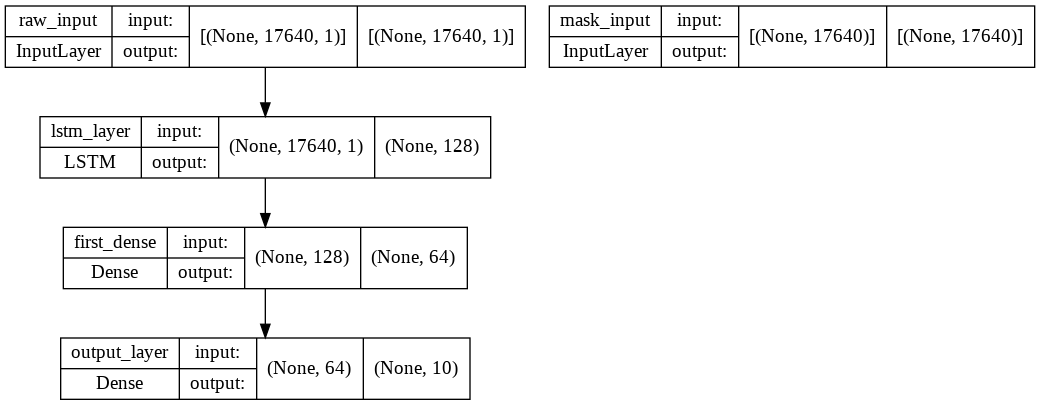

In [39]:
# Plotting the Model
from tensorflow.keras.utils import plot_model
plot_model(model_3, show_shapes=True)

In [ ]:
#train your model
#model1.fit([X_train_pad_seq,X_train_mask],y_train_int,.........)

In [40]:
# Importing Callbacks
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import TensorBoard
import os

In [41]:
if 'Model_3' not in os.listdir():
    os.mkdir('Model_3')
    os.mkdir('Model_3/saved_models')
    os.mkdir('Model_3/tb_logs')

In [42]:
# Defining micro_f1 score metric class
from sklearn.metrics import f1_score
import tensorflow as tf

class F1_Metric(tf.keras.callbacks.Callback):

    def __init__(self, validation_data):
        super().__init__()
        self.x_val = validation_data[0]
        self.y_val = validation_data[1]

    def on_train_begin(self, logs={}):
        logs = {'micro_f1_val':[]}

    def on_epoch_end(self, epoch, logs={}):

        val_pred = np.asarray(self.model.predict(self.x_val))
        val_label = np.argmax(val_pred, axis=1)
        val_target = self.y_val
        score = f1_score(val_label, val_target, average='micro')
        logs['micro_f1_val'] = score

In [43]:
save_path = '/content/Model_3/saved_models/{epoch:02d}_{val_loss:.3f}.hdf5'
saver = ModelCheckpoint(filepath=save_path, monitor='val_loss', save_best_only=False)
logs_path = '/content/Model_3/tb_logs'
tb = TensorBoard(log_dir=logs_path)
stopper = EarlyStopping(patience=5)
f1 = F1_Metric(([X_test_pad_seq, X_test_mask], y_test))

In [44]:
# Compiling Model_1
callbacks = [saver, tb, stopper, f1]

model_3.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics = ['accuracy'])

In [ ]:
history_3 = model_3.fit([aug_X_train_pad_seq, aug_X_train_mask], augmented_y_train, batch_size=16,
                        epochs=15, validation_data=([X_test_pad_seq, X_test_mask], y_test),
                        callbacks=callbacks)

Epoch 1/15
900/900 [==============================] - 531s 590ms/step - loss: 2.3030 - accuracy: 0.0962 - val_loss: 2.3026 - val_accuracy: 0.1000 - micro_f1_val: 0.1000
Epoch 2/15
900/900 [==============================] - 525s 584ms/step - loss: 2.3030 - accuracy: 0.0949 - val_loss: 2.3026 - val_accuracy: 0.1000 - micro_f1_val: 0.1000
Epoch 3/15
900/900 [==============================] - 528s 586ms/step - loss: 2.3123 - accuracy: 0.0970 - val_loss: 2.3026 - val_accuracy: 0.1000 - micro_f1_val: 0.1000
Epoch 4/15
900/900 [==============================] - 530s 589ms/step - loss: 2.3029 - accuracy: 0.0974 - val_loss: 2.3026 - val_accuracy: 0.1000 - micro_f1_val: 0.1000
Epoch 5/15
900/900 [==============================] - 530s 589ms/step - loss: 2.3029 - accuracy: 0.0935 - val_loss: 2.3026 - val_accuracy: 0.1000 - micro_f1_val: 0.1000
Epoch 6/15
900/900 [==============================] - 532s 591ms/step - loss: 2.3029 - accuracy: 0.0966 - val_loss: 2.3026 - val_accuracy: 0.1000 - micro_f

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=/content/Model_3/tb_logs

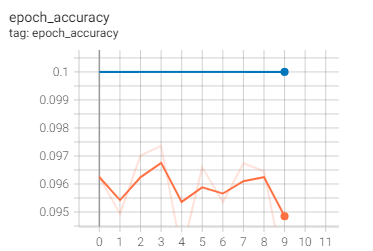

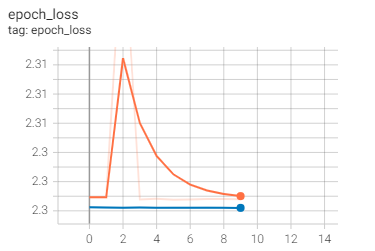


By analyzing above plots and training logs,  model state after 7th epoch is selected as best_model3.

In [ ]:
best_model3 = tf.keras.models.load_model('/content/Model_3/saved_models/07_2.303.hdf5')
m3_eval = best_model3.evaluate([X_test_pad_seq, X_test_mask], y_test)

13/13 [==============================] - 4s 241ms/step - loss: 2.3026 - accuracy: 0.1000


In [ ]:
m3_preds = best_model3.predict([X_test_pad_seq, X_test_mask])
m3_preds = np.argmax(m3_preds, axis=1)
m3_f1 = f1_score(y_test, m3_preds, average='micro')

In [ ]:
print("Best Model 3 Parameters: ")
print(f"Val_loss: {np.round(m3_eval[0],4)}")
print(f"Val_accuracy: {np.round(m3_eval[1],4)}")
print(f"Val_micro_f1: {np.round(m3_f1, 4)}")

Best Model 3 Parameters: 
Val_loss: 2.3026
Val_accuracy: 0.1
Val_micro_f1: 0.1


### Model 4: Data augmentation with spectogram data

1. use convert_to_spectrogram and convert the padded data from train and test data to spectogram data.
2. The shape of train data will be 14400 x 64 x 35 and shape of test_data will be 400 x 64 x35
3. Define the model similar to model 2 and fit the data

In [45]:
def convert_to_spectrogram(raw_data):
    '''converting to spectrogram'''
    spectrum = librosa.feature.melspectrogram(y=raw_data, sr=sample_rate, n_mels=64)
    logmel_spectrum = librosa.power_to_db(S=spectrum, ref=np.max)
    return logmel_spectrum

In [46]:
##use convert_to_spectrogram and convert every raw sequence in X_train_pad_seq and X_test_pad-seq.
## save those all in the X_train_spectrogram and X_test_spectrogram ( These two arrays must be numpy arrays)

# Converting train raw data into spectrogram
aug_X_train_spectrogram = np.asarray([convert_to_spectrogram(data) for data in tqdm(aug_X_train_pad_seq)])

# Converting test raw data into spectrogram
X_test_spectrogram = np.asarray([convert_to_spectrogram(data) for data in tqdm(X_test_pad_seq)])

print(f"aug_X_train_spectrogram shape: {aug_X_train_spectrogram.shape}")
print(f"X_test_spectrogram shape: {X_test_spectrogram.shape}")

100%|██████████| 400/400 [00:02<00:00, 199.09it/s]

aug_X_train_spectrogram shape: (14400, 64, 35)
X_test_spectrogram shape: (400, 64, 35)


In [47]:
from tensorflow.keras.layers import Input, LSTM, Dense, GlobalAveragePooling1D
from tensorflow.keras.models import Model
import tensorflow as tf

In [48]:
# Defining Model 4
input_layer = Input(shape=(64, 35), dtype='float32', name='spectro_input')
lstm_layer = LSTM(128, activation='tanh', return_sequences=True, name='lstm_layer')(input_layer)
pool_1d = GlobalAveragePooling1D(name='avg_pool', data_format='channels_first')(lstm_layer)
dense1 = Dense(64, activation='relu', name='first_dense')(pool_1d)
dense2 = Dense(32, activation='relu', name='second_dense')(dense1)
dense3 = Dense(16, activation='relu', name='third_dense')(dense2)
output = Dense(10, activation='sigmoid', name='output_layer')(dense3)

model_4 = Model(inputs=input_layer, outputs=output, name='model_4')

model_4.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 spectro_input (InputLayer)  [(None, 64, 35)]          0         
                                                                 
 lstm_layer (LSTM)           (None, 64, 128)           83968     
                                                                 
 avg_pool (GlobalAveragePool  (None, 64)               0         
 ing1D)                                                          
                                                                 
 first_dense (Dense)         (None, 64)                4160      
                                                                 
 second_dense (Dense)        (None, 32)                2080      
                                                                 
 third_dense (Dense)         (None, 16)                528       
                                                           

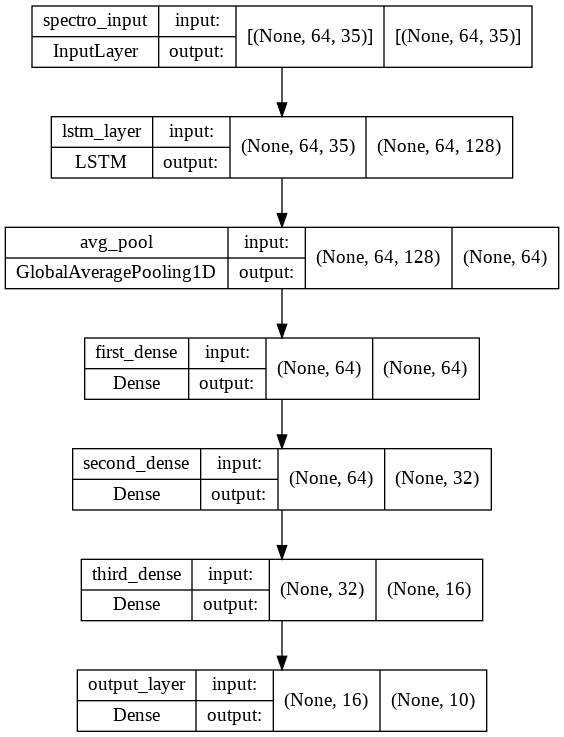

In [49]:
# Plotting model_2
from tensorflow.keras.utils import plot_model
plot_model(model_4, show_shapes=True)

In [50]:
# Defining micro_f1 score metric class
from sklearn.metrics import f1_score
import tensorflow as tf

class F1_Metric(tf.keras.callbacks.Callback):

    def __init__(self, validation_data):
        super().__init__()
        self.x_val = validation_data[0]
        self.y_val = validation_data[1]

    def on_train_begin(self, logs={}):
        logs = {'micro_f1_val':[]}

    def on_epoch_end(self, epoch, logs={}):

        val_pred = np.asarray(self.model.predict(self.x_val))
        val_label = np.argmax(val_pred, axis=1)
        val_target = self.y_val
        score = f1_score(val_label, val_target, average='micro')
        logs['micro_f1_val'] = score

In [51]:
# Importing Callbacks
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import TensorBoard
import os

In [52]:
if 'Model_4' not in os.listdir():
    os.mkdir('Model_4')
    os.mkdir('Model_4/saved_models')
    os.mkdir('Model_4/tb_logs')

In [53]:
save_path = '/content/Model_4/saved_models/epoch-{epoch:02d}_val_loss-{val_loss:.3f}.hdf5'
saver = ModelCheckpoint(filepath=save_path, monitor='val_loss', save_best_only=True)
logs_path = '/content/Model_4/tb_logs'
tb = TensorBoard(log_dir=logs_path)
stopper = EarlyStopping(monitor='val_loss', patience=7)

In [54]:
f1 = F1_Metric([X_test_spectrogram, y_test])
callbacks = [f1, saver, tb, stopper]

In [55]:
model_4.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=['accuracy'])

In [56]:
history_4 = model_4.fit(aug_X_train_spectrogram, augmented_y_train, batch_size=32,
                        epochs=50, validation_data=(X_test_spectrogram, y_test),
                        callbacks=callbacks)

Epoch 1/50
450/450 [==============================] - 10s 9ms/step - loss: 1.5666 - accuracy: 0.4051 - val_loss: 1.0294 - val_accuracy: 0.6225 - micro_f1_val: 0.6225
Epoch 2/50
450/450 [==============================] - 3s 6ms/step - loss: 0.9870 - accuracy: 0.6161 - val_loss: 0.8434 - val_accuracy: 0.6875 - micro_f1_val: 0.6875
Epoch 3/50
450/450 [==============================] - 3s 6ms/step - loss: 0.8810 - accuracy: 0.6628 - val_loss: 0.7942 - val_accuracy: 0.7050 - micro_f1_val: 0.7050
Epoch 4/50
450/450 [==============================] - 3s 7ms/step - loss: 0.7795 - accuracy: 0.7065 - val_loss: 0.7112 - val_accuracy: 0.7500 - micro_f1_val: 0.7500
Epoch 5/50
450/450 [==============================] - 3s 6ms/step - loss: 0.7229 - accuracy: 0.7320 - val_loss: 0.6598 - val_accuracy: 0.7750 - micro_f1_val: 0.7750
Epoch 6/50
450/450 [==============================] - 3s 6ms/step - loss: 0.6799 - accuracy: 0.7471 - val_loss: 0.6159 - val_accuracy: 0.7750 - micro_f1_val: 0.7750
Epoch 7/5

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=/content/Model_4/tb_logs

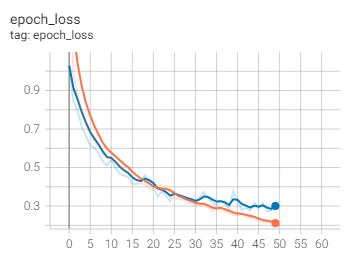

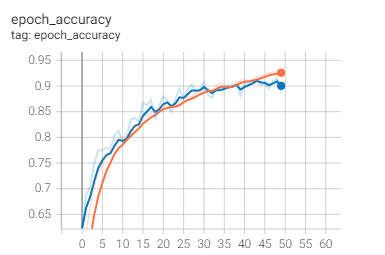

By analyzing above plots and training logs,  model state after 42th epoch is selected as best_model4.



In [58]:
best_model4 = tf.keras.models.load_model('/content/Model_4/saved_models/epoch-42_val_loss-0.280.hdf5')
m4_eval = best_model4.evaluate([X_test_spectrogram], y_test)

13/13 [==============================] - 0s 4ms/step - loss: 0.2803 - accuracy: 0.9075


In [59]:
m4_preds = best_model4.predict([X_test_spectrogram])
m4_preds = np.argmax(m4_preds, axis=1)
m4_f1 = f1_score(y_test, m4_preds, average='micro')

In [60]:
print("Best Model 4 Parameters: ")
print(f"Val_loss: {np.round(m4_eval[0],4)}")
print(f"Val_accuracy: {np.round(m4_eval[1],4)}")
print(f"Val_micro_f1: {np.round(m4_f1, 4)}")

Best Model 4 Parameters: 
Val_loss: 0.2803
Val_accuracy: 0.9075
Val_micro_f1: 0.9075


## Summary:

In [62]:
# Printing summary of all 4 models
from prettytable import PrettyTable

summary_tab = PrettyTable(field_names=['Model Name', 'Architecture', 'Val_Loss', 'Val_Accuracy', 'Val_Micro_f1_score '])
summary_tab.add_rows([['Model_1', 'LSTM on raw_data', 2.3025, 0.1017, 0.1017],
                     ['Model_2', 'LSTM on spectrogram data', 0.4626, 0.8533, 0.8533],
                     ['Model_3', 'Data Augmentation + LSTM on raw_data', 2.3026, 0.1, 0.1],
                     ['Model_4', 'Data Augmentation + LSTM on spectrogram data', 0.2803, 0.9075, 0.9075]])
print(summary_tab)

+------------+----------------------------------------------+----------+--------------+---------------------+
| Model Name |                 Architecture                 | Val_Loss | Val_Accuracy | Val_Micro_f1_score  |
+------------+----------------------------------------------+----------+--------------+---------------------+
|  Model_1   |               LSTM on raw_data               |  2.3025  |    0.1017    |        0.1017       |
|  Model_2   |           LSTM on spectrogram data           |  0.4626  |    0.8533    |        0.8533       |
|  Model_3   |     Data Augmentation + LSTM on raw_data     |  2.3026  |     0.1      |         0.1         |
|  Model_4   | Data Augmentation + LSTM on spectrogram data |  0.2803  |    0.9075    |        0.9075       |
+------------+----------------------------------------------+----------+--------------+---------------------+


From above summary, it can be concluded that, Model_4 can be futher fine tuned and used in developing Spoken Digit Recognition Application.